<h1 style="color:orange">EXERCISE CLASS 4 - Additional Excercises</h1>

# Additional exercise 1

In a shop floor, the head of the quality assurance department is interested in keeping under control the stability of a turning process.
Every day, the cylindrical rings are produced in four temporally consecutive batches denoted as A (early morning), B (late morning), C (early afternoon), D (late afternoon).
One cylindrical ring is collected and its outer diameter (cm) is measured every day in each batch.
A dataset consisting of 25 consecutive sample collections is stored in 'ESE4_add_ex1.csv'.
Identify a suitable model.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Import the dataset
data = pd.read_csv('ESE4_add_ex1.csv')

# Inspect the dataset
data.head()

,Diameter
0,2.92
1,2.90
2,4.07
3,3.09
4,3.63


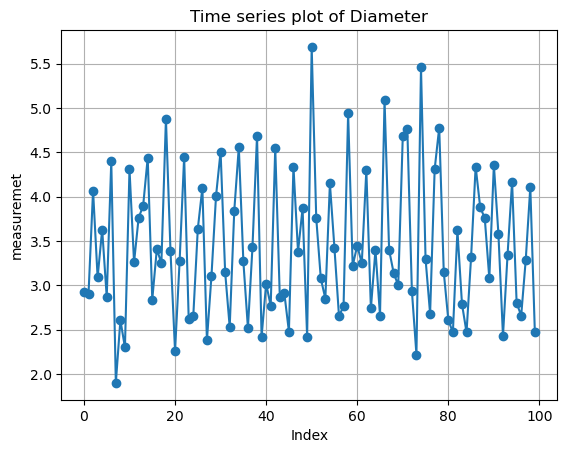

In [2]:
# Plot the data 
plt.plot(data['Diameter'], 'o-')
plt.xlabel('Index')
plt.ylabel('measuremet')
plt.title('Time series plot of Diameter')
plt.grid()
plt.show()

Runs test p-value = 0.094


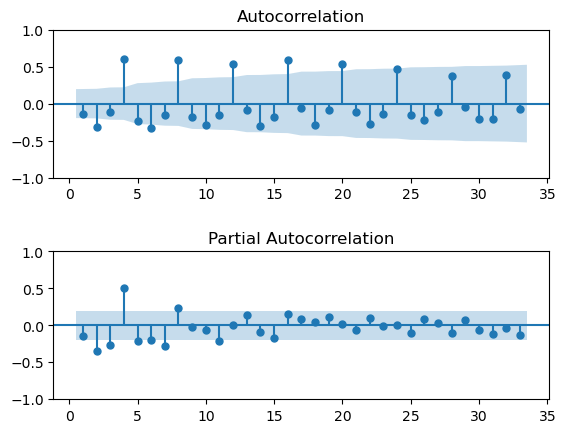

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['Diameter'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['Diameter'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['Diameter'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> Runs test would lead to not reject the randmness assumption at 95% confidence, but the time series exhibits a clear pattern.

> <t1 style="color:red"> Batch effect? </t1>

> Let's create DAY and BATCH variables

In [4]:
# Create Batch variable
data['Batch'] = np.tile(np.arange(1, 5), int(len(data)/4)) #tile the simple batches array ([1 2 3 4]) for 25 times
data['Day'] = np.repeat(np.arange(1, len(data)/4+1), 4) #repeate the element of the days array [from 1 to 25] for time each element

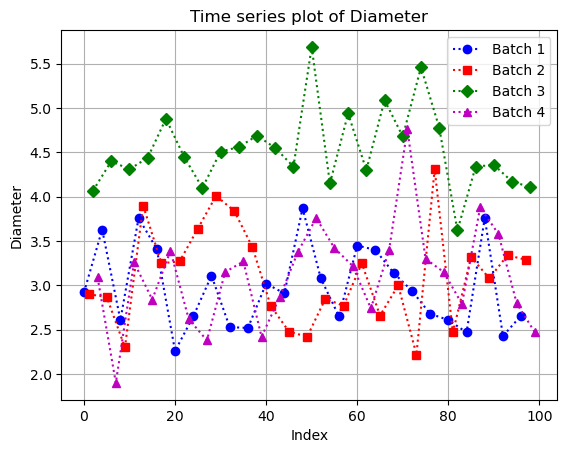

In [5]:
# Plot the data as 4 separate batches
#we need to extract the data for each batch; change the color, the line, and the marker; assign a label for each batch

plt.plot(data['Diameter'][data['Batch'] == 1], 'o:b', label = 'Batch 1') 
plt.plot(data['Diameter'][data['Batch'] == 2], 's:r', label = 'Batch 2')
plt.plot(data['Diameter'][data['Batch'] == 3], 'D:g', label = 'Batch 3')
plt.plot(data['Diameter'][data['Batch'] == 4], '^:m', label = 'Batch 4')

plt.xlabel('Index')
plt.ylabel('Diameter')
plt.legend()
plt.title('Time series plot of Diameter')
plt.grid()
plt.show()

> <t1 style="color:red"> Batch 3 yields systematically a larger diameter than the other batches. </t1>

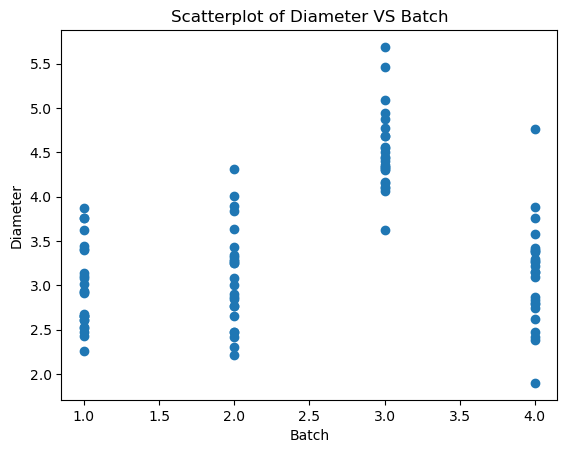

In [6]:
#Other possible graphs: scatterplot of Diameter VS batch
plt.scatter(data['Batch'], data['Diameter'])
plt.xlabel('Batch')
plt.ylabel('Diameter')
plt.title('Scatterplot of Diameter VS Batch')
plt.show()

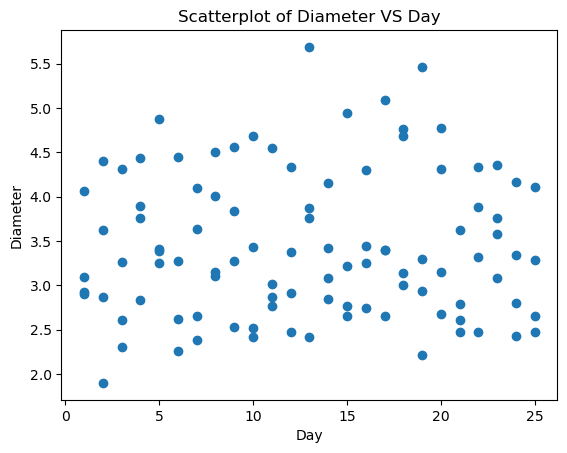

In [7]:
#Other possible graphs: scatterplot of Diameter VS day
plt.scatter(data['Day'], data['Diameter'])
plt.xlabel('Day')
plt.ylabel('Diameter')
plt.title('Scatterplot of Diameter VS Day')
plt.show()

> # Which type of model?  
> Dummy variable:
> - =0 for batches A, B and D
> - =1 for batch C

In [8]:
# create the dummy variable 
data['Dummy'] = np.tile(np.array([0, 0, 1, 0]), int(len(data)/4))


In [9]:
#calculate a regression model with constant and dummy
import statsmodels.api as sm
import qda

x = data['Dummy']
x = sm.add_constant(data['Dummy']) 
y = data['Diameter']
model = sm.OLS(y, x).fit()

qda.summary(model)

REGRESSION EQUATION
-------------------
Diameter =  + 3.066 const + 1.454 Dummy

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 3.0660   0.0591  51.8649 4.6112e-73
Dummy 1.4536   0.1182  12.2947 1.4247e-21

MODEL SUMMARY
-------------
    S   R-sq  R-sq(adj)
0.512 0.6067     0.6027

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS   Adj MS   F-Value    P-Value
Regression  1.0  39.6179  39.6179  151.1585 1.4247e-21
     const  1.0 705.0267 705.0267 2689.9677 4.6112e-73
     Dummy  1.0  39.6179  39.6179  151.1585 1.4247e-21
     Error 98.0  25.6853   0.2621       NaN        NaN
     Total 99.0  65.3032      NaN       NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.149


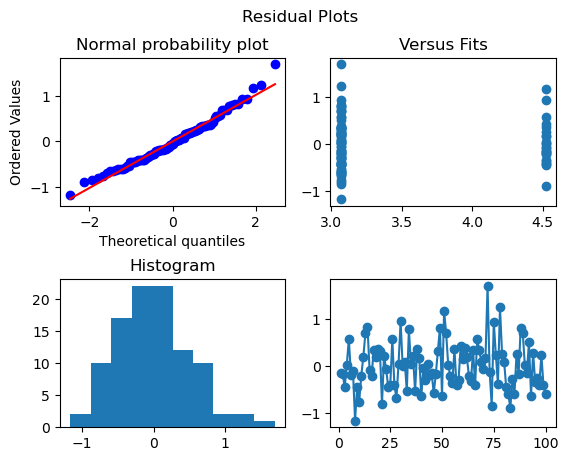

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Runs test p-value on the residuals = 0.699


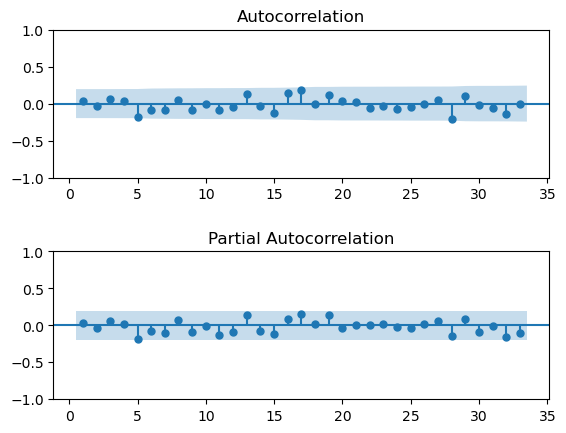

In [11]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

> The model is adequate: Residuals and normal and independent.

> What if we used a diffrent dummy variable definition?  
> Let's try to use the Batch variable as a set of categorical dummy variables.

In [12]:
#create a vectors for dummy variables associated to each batch
data['Dummy_Batch1'] = np.where(data['Batch']==1, 1, 0)
data['Dummy_Batch2'] = np.where(data['Batch']==2, 1, 0)
data['Dummy_Batch3'] = np.where(data['Batch']==3, 1, 0)
data['Dummy_Batch4'] = np.where(data['Batch']==4, 1, 0)

x = data[['Dummy_Batch1', 'Dummy_Batch2', 'Dummy_Batch3', 'Dummy_Batch4']]
x = sm.add_constant(x) 
y = data['Diameter']
model = sm.OLS(y, x).fit()

qda.summary(model)

REGRESSION EQUATION
-------------------
Diameter =  + 2.744 const + 0.235 Dummy_Batch1 + 0.362 Dummy_Batch2 + 1.776 Dummy_Batch3 + 0.370 Dummy_Batch4

COEFFICIENTS
------------
        Term   Coef  SE Coef  T-Value    P-Value
       const 2.7435   0.0411  66.6718 3.3063e-82
Dummy_Batch1 0.2353   0.0897   2.6234 1.0126e-02
Dummy_Batch2 0.3621   0.0897   4.0373 1.0877e-04
Dummy_Batch3 1.7761   0.0897  19.8039 1.1292e-35
Dummy_Batch4 0.3701   0.0897   4.1265 7.8447e-05

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.5171 0.6111     0.5989

ANALYSIS OF VARIANCE
---------------------
      Source   DF    Adj SS    Adj MS   F-Value    P-Value
  Regression  3.0   39.9038   13.3013   50.2738 1.2792e-19
       const  1.0 1176.0784 1176.0784 4445.1343 3.3063e-82
Dummy_Batch1  1.0    1.8209    1.8209    6.8825 1.0126e-02
Dummy_Batch2  1.0    4.3126    4.3126   16.2999 1.0877e-04
Dummy_Batch3  1.0  103.7651  103.7651  392.1932 1.1292e-35
Dummy_Batch4  1.0    4.5052    4.5052   17.0281 7.84

Shapiro-Wilk test p-value on the residuals = 0.178
Runs test p-value on the residuals = 0.971


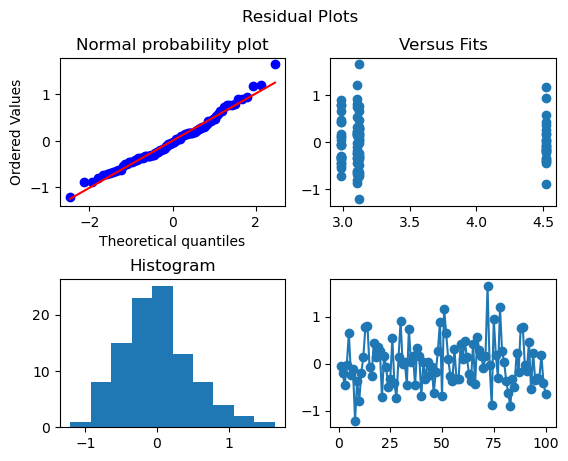

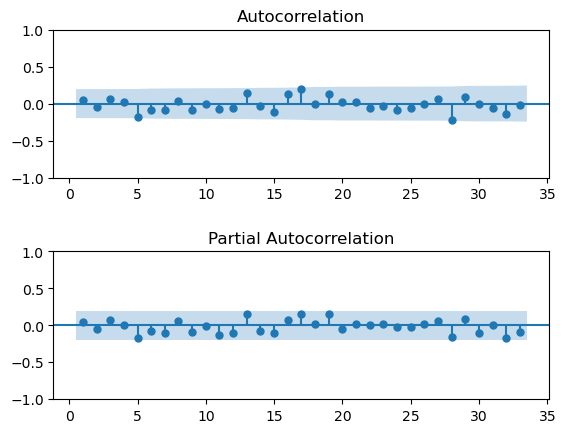

In [13]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

> The model is similar, with an R-squared adjusted of 0.599 (against the previous of 0.603).